In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
house.data.shape, house.target.shape

((20640, 8), (20640,))

In [4]:
print(house.data[0:5])
print(house.target[0:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    house.data, house.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [7]:
'''
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
'''
# wide-deep模型不适合序贯型，而函数式API更合适
inputs = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(inputs)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([inputs, hidden2])
outputs = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[inputs], outputs=[outputs])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [8]:
history = model.fit(x_train_scaled, y_train,
                   validation_data=(x_valid_scaled, y_valid),
                   epochs=100,
                   callbacks=[keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 186us/sample - loss: 0.8261 - val_loss: 0.5664
Epoch 2/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.4574 - val_loss: 0.4361
Epoch 3/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.3960 - val_loss: 0.4061
Epoch 4/100
11610/11610 [==============================] - 1s 105us/sample - loss: 0.3850 - val_loss: 0.3886
Epoch 5/100
11610/11610 [==============================] - 1s 101us/sample - loss: 0.3638 - val_loss: 0.3703
Epoch 6/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3556 - val_loss: 0.3647
Epoch 7/100
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3486 - val_loss: 0.3584
Epoch 8/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3377 - val_loss: 0.3381
Epoch 9/100
11610/11610 [==============================] - 1s 94us/sample - loss: 

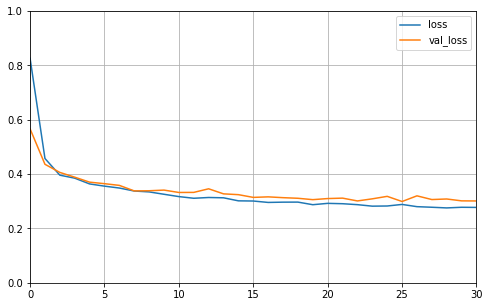

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [11]:
model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.31480572759643083